In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pyarrow as pa
import pyarrow.parquet as pq

In [4]:
df = pd.read_parquet('data/CaseRigshospitalet_optimized.parquet')
df.head()

,Patient ID,Patientkontakt ID,Patient alder på kontaktstart tidspunkt,Kontakt startdato,Kontakt slutdato,Kontakttype,Indlæggelsesmåde,Patientkontakttype,Aktionsdiagnosekode,Bidiagnosekode,...,Procedure udført,Behandlingskontakt ID,Besøgstype,Patient køn,Patient civilstand,Patient oprettet på Min SP (J/N),Patient land,Patient region,Patient postnummer,Patient kommune
0,Z4115614,1301023075465,0,2023-01-13 12:32:00,2023-01-13 13:02:00,Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,,...,2023-01-13 12:32:00,176.794.528,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
1,Z4115614,1301023121831,0,2023-01-15 13:27:00,2023-01-15 13:57:00,Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,,...,2023-01-15 13:27:00,177.035.032,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
2,Z4119225,1301023357249,0,2023-01-30 10:20:00,2023-01-30 10:50:00,Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,,...,2023-01-30 10:20:00,178.269.449,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
3,Z4127033,1301023443807,0,2023-02-04 12:46:00,2023-02-04 13:16:00,Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,,...,2023-02-04 12:46:00,178.703.583,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
4,Z4127033,1301023443875,0,2023-02-05 12:22:00,2023-02-05 12:52:00,Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,,...,2023-02-05 12:22:00,178.703.779,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658066 entries, 0 to 4658065
Data columns (total 24 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   Patient ID                               category      
 1   Patientkontakt ID                        int64         
 2   Patient alder på kontaktstart tidspunkt  Int16         
 3   Kontakt startdato                        datetime64[ns]
 4   Kontakt slutdato                         datetime64[ns]
 5   Kontakttype                              category      
 6   Indlæggelsesmåde                         category      
 7   Patientkontakttype                       category      
 8   Aktionsdiagnosekode                      category      
 9   Bidiagnosekode                           category      
 10  Behandlingsansvarlig Afdeling            category      
 11  Kontakt varighed (timer)                 float32       
 12  Procedure-kode              

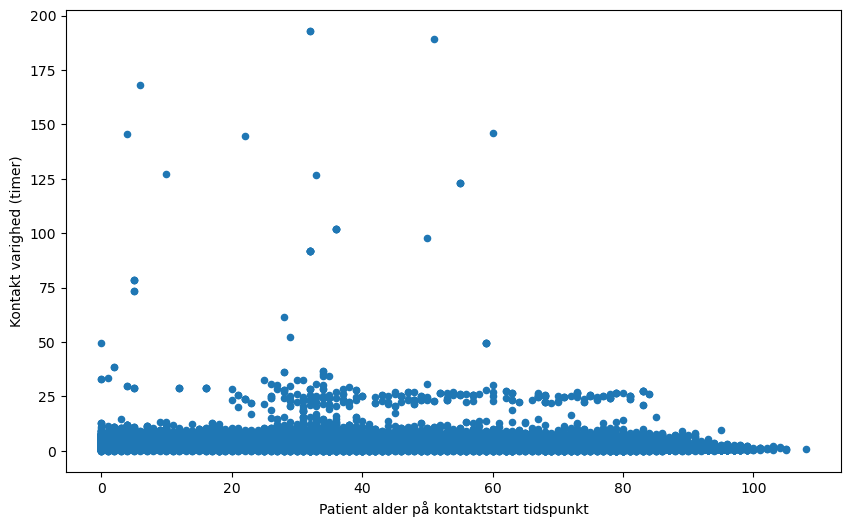

In [6]:
sample_df = df.sample(100000)  
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size  
sample_df.plot.scatter(x='Patient alder på kontaktstart tidspunkt', y='Kontakt varighed (timer)', ax=ax)  
plt.show()

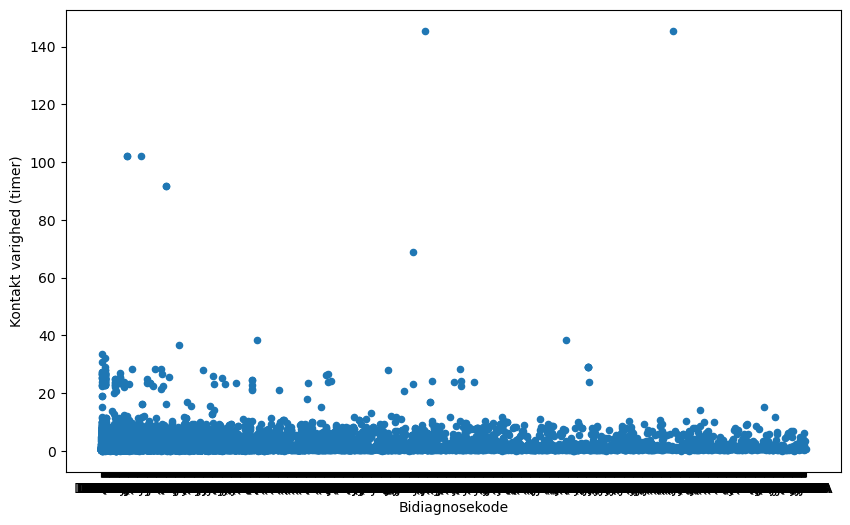

In [24]:
filtered_df = sample_df.dropna(subset=['Bidiagnosekode'])
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size  
filtered_df.plot.scatter(x='Bidiagnosekode', y='Kontakt varighed (timer)', ax=ax)  
plt.show()

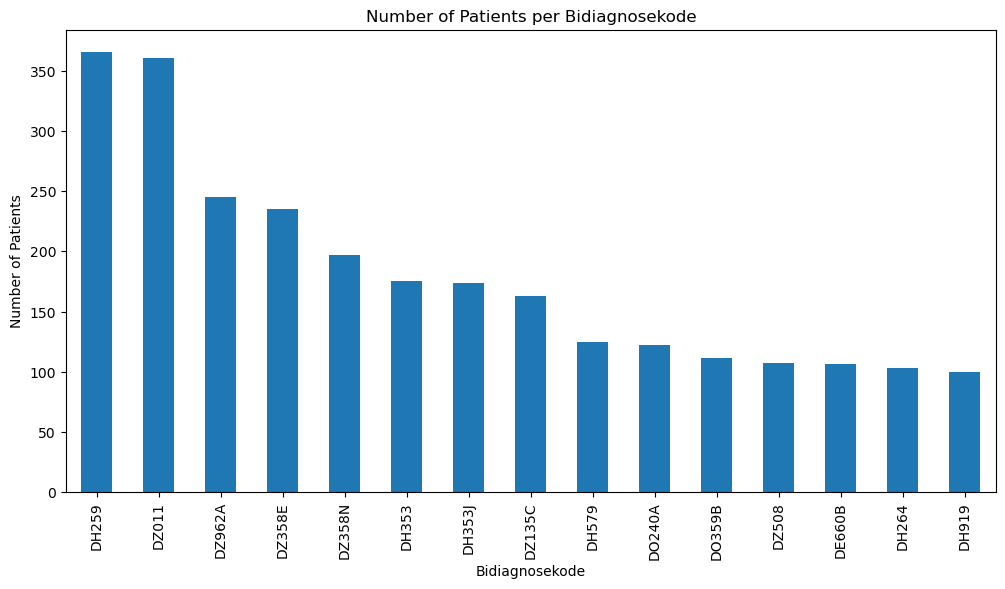

In [33]:
# Count the number of patients per Bidiagnosekode
bidiagnose_counts = filtered_df['Bidiagnosekode'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
bidiagnose_counts[:15].plot(kind='bar')
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.xlabel('Bidiagnosekode')
plt.ylabel('Number of Patients')
plt.title('Number of Patients per Bidiagnosekode')
plt.show()

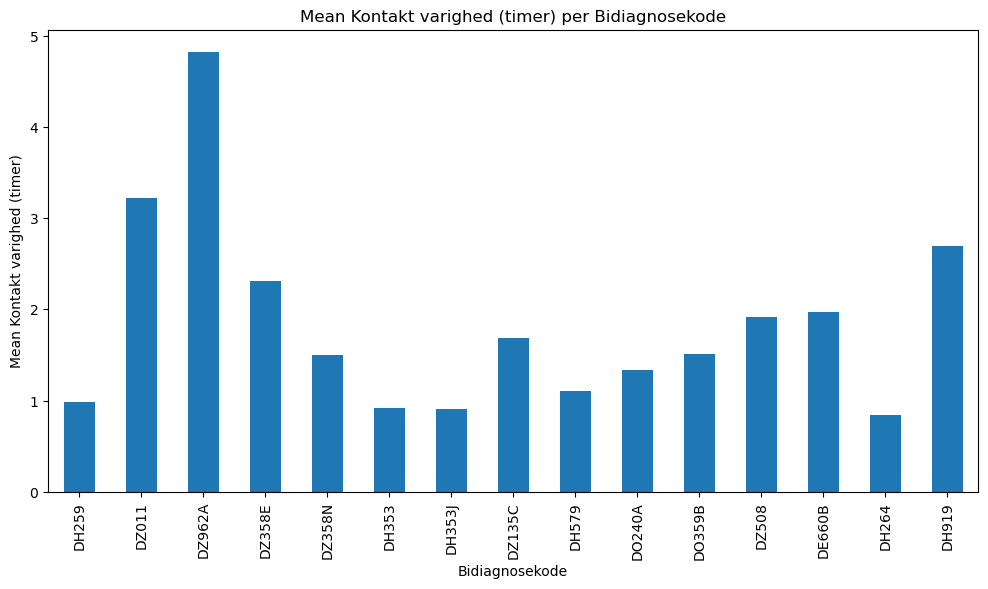

In [36]:
#plot mean Kontakt varighed (timer) per Bidiagnosekode of the top 15 Bidiagnosekodes
top_15_bidiagnose = bidiagnose_counts[:15].index
mean_varighed = filtered_df.groupby('Bidiagnosekode')['Kontakt varighed (timer)'].mean()
mean_varighed = mean_varighed.loc[top_15_bidiagnose]
#plot mean Kontakt varighed (timer) per Bidiagnosekode of the top 15 Bidiagnosekodes
plt.figure(figsize=(12, 6))
mean_varighed.plot(kind='bar')
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.xlabel('Bidiagnosekode')
plt.ylabel('Mean Kontakt varighed (timer)')
plt.title('Mean Kontakt varighed (timer) per Bidiagnosekode')
plt.show()


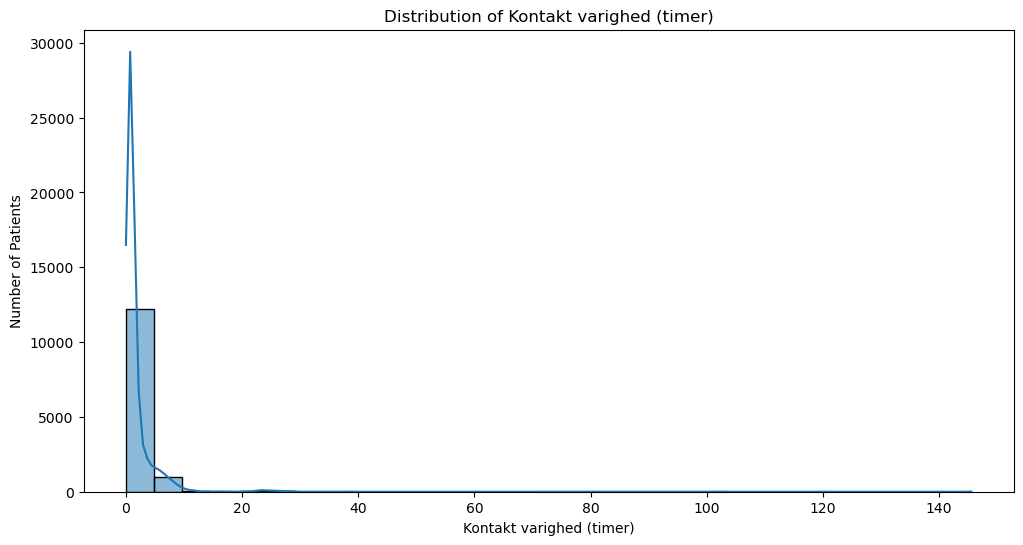

In [34]:
#plot the distribution of Kontakt varighed (timer)
plt.figure(figsize=(12, 6)) 
sns.histplot(filtered_df['Kontakt varighed (timer)'], bins=30, kde=True)
plt.xlabel('Kontakt varighed (timer)')  
plt.ylabel('Number of Patients')
plt.title('Distribution of Kontakt varighed (timer)')
plt.show()

C:\Users\jacob\AppData\Local\Temp\ipykernel_17528\1442127305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Kontakt startdato'] = pd.to_datetime(filtered_df['Kontakt startdato'])


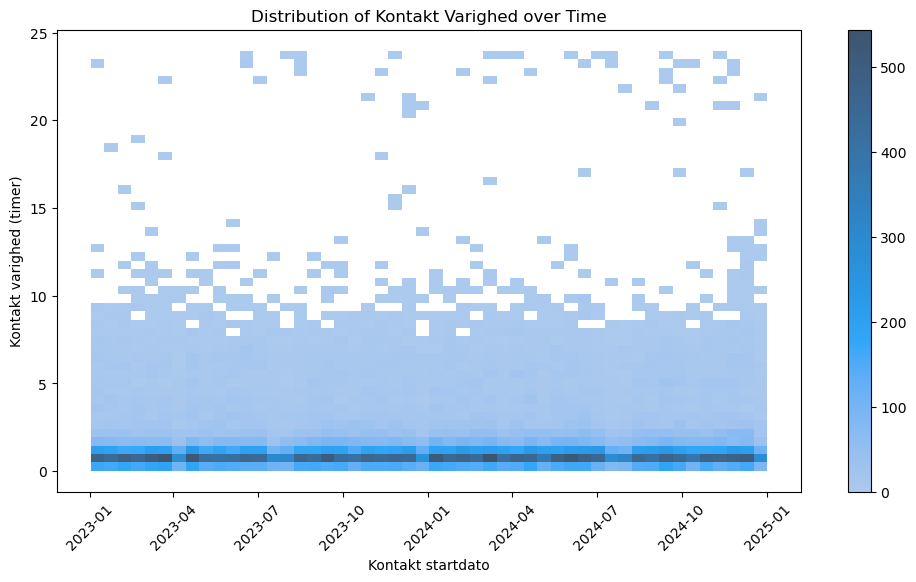

In [43]:
# Filter data where 'Kontakt varighed (timer)' is below 24
filtered_df = sample_df[sample_df['Kontakt varighed (timer)'] < 24]

# Convert 'Kontakt startdato' to datetime if it's not already
filtered_df['Kontakt startdato'] = pd.to_datetime(filtered_df['Kontakt startdato'])

# Create the 2D histogram (hexbin-style)
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_df, x='Kontakt startdato', y='Kontakt varighed (timer)', bins=50, cbar=True)

# Formatting
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Kontakt startdato')
plt.ylabel('Kontakt varighed (timer)')
plt.title('Distribution of Kontakt Varighed over Time')

plt.show()

In [44]:
sample_df['Kontakttype'].value_counts()

Kontakttype
Fysisk fremmøde    45374
Virtuel pt.kt.      5584
Udekontakt            42
Name: count, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658066 entries, 0 to 4658065
Data columns (total 24 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   Patient ID                               object        
 1   Patientkontakt ID                        int64         
 2   Patient alder på kontaktstart tidspunkt  int64         
 3   Kontakt startdato                        datetime64[ns]
 4   Kontakt slutdato                         datetime64[ns]
 5   Kontakttype                              object        
 6   Indlæggelsesmåde                         object        
 7   Patientkontakttype                       object        
 8   Aktionsdiagnosekode                      object        
 9   Bidiagnosekode                           object        
 10  Behandlingsansvarlig Afdeling            object        
 11  Kontakt varighed (timer)                 float64       
 12  Procedure-kode              

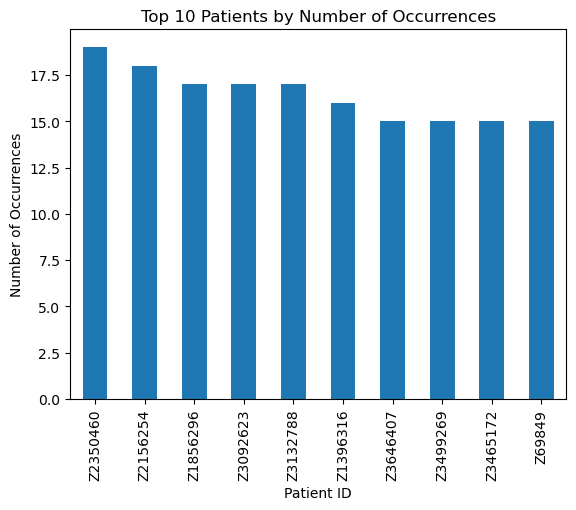

In [58]:
# Count occurrences of each Patient ID and get the top X
top_patients = sample_df['Patient ID'].value_counts().head(10).index

# Filter the DataFrame to only include rows with those top X patients
filtered_df = sample_df[sample_df['Patient ID'].isin(top_patients)]
filtered_df['Patient ID'].value_counts()
filtered_df['Patient ID'].value_counts().plot(kind='bar')
plt.xlabel('Patient ID')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Patients by Number of Occurrences')
plt.show()


In [1]:
x=10000
top_patients = df['Patient ID'].value_counts().head(x).index

# Filter the DataFrame to include only rows with the top X patients
filtered_df = df[df['Patient ID'].isin(top_patients)]

# Count occurrences of 'Aktionsdiagnosekode' for the top patients
aktionsdiagnose_counts = filtered_df['Aktionsdiagnosekode'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
aktionsdiagnose_counts[:10].plot(kind='bar')

# Labels and title
plt.xlabel('Aktionsdiagnosekode')
plt.ylabel('Number of Occurrences')
plt.title(f'Top 10 diagnoses based on top {x} Patients by Occurrences')
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()

NameError: name 'df' is not defined

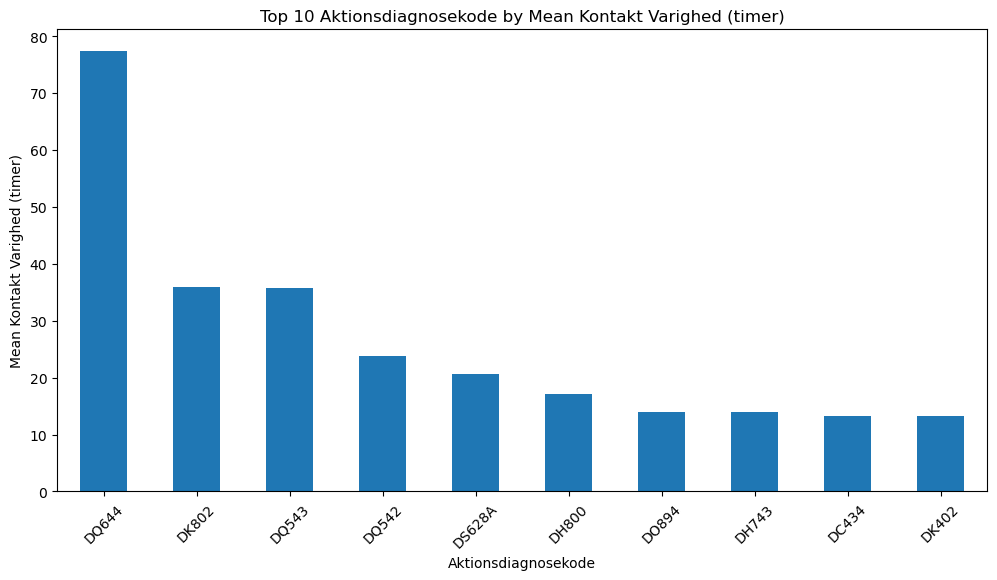

In [71]:
mean_duration = df.groupby('Aktionsdiagnosekode')['Kontakt varighed (timer)'].mean()

# Get the top 10 'Aktionsdiagnosekode' based on mean 'Kontakt varighed (timer)'
top_aktionsdiagnose = mean_duration.nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
top_aktionsdiagnose.plot(kind='bar')

# Labels and title
plt.xlabel('Aktionsdiagnosekode')
plt.ylabel('Mean Kontakt Varighed (timer)')
plt.title('Top 10 Aktionsdiagnosekode by Mean Kontakt Varighed (timer)')
plt.xticks(rotation=45)  # Rotate labels for readability

plt.show()

In [ ]:
mean_duration = df.groupby('Aktionsdiagnosekode')['Kontakt varighed (timer)'].mean()

# Get the top 10 'Aktionsdiagnosekode' based on mean 'Kontakt varighed (timer)'
top_aktionsdiagnose = mean_duration.nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
top_aktionsdiagnose.plot(kind='bar')

# Labels and title
plt.xlabel('Aktionsdiagnosekode')
plt.ylabel('Mean Kontakt Varighed (timer)')
plt.title('Top 10 Aktionsdiagnosekode by Mean Kontakt Varighed (timer)')
plt.xticks(rotation=45)  # Rotate labels for readability

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658066 entries, 0 to 4658065
Data columns (total 24 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   Patient ID                               category      
 1   Patientkontakt ID                        int64         
 2   Patient alder på kontaktstart tidspunkt  Int16         
 3   Kontakt startdato                        datetime64[ns]
 4   Kontakt slutdato                         datetime64[ns]
 5   Kontakttype                              category      
 6   Indlæggelsesmåde                         category      
 7   Patientkontakttype                       category      
 8   Aktionsdiagnosekode                      category      
 9   Bidiagnosekode                           category      
 10  Behandlingsansvarlig Afdeling            category      
 11  Kontakt varighed (timer)                 float32       
 12  Procedure-kode              

In [ ]:
df['weekday'] = df['Kontakt startdato'].dt.day_name()

In [21]:
df['Indlæggelsesmåde'].unique()

['Planlagt', 'Akut']
Categories (2, object): ['Akut', 'Planlagt']

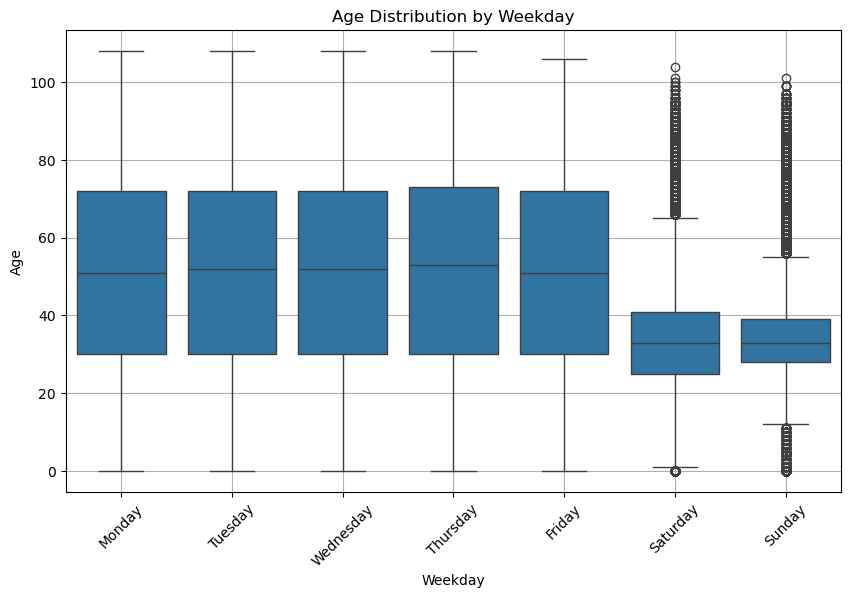

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weekday', y='Patient alder på kontaktstart tidspunkt', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Labels and title
plt.xlabel('Weekday')
plt.ylabel('Age')
plt.title('Age Distribution by Weekday')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True)

# Show plot
plt.show()

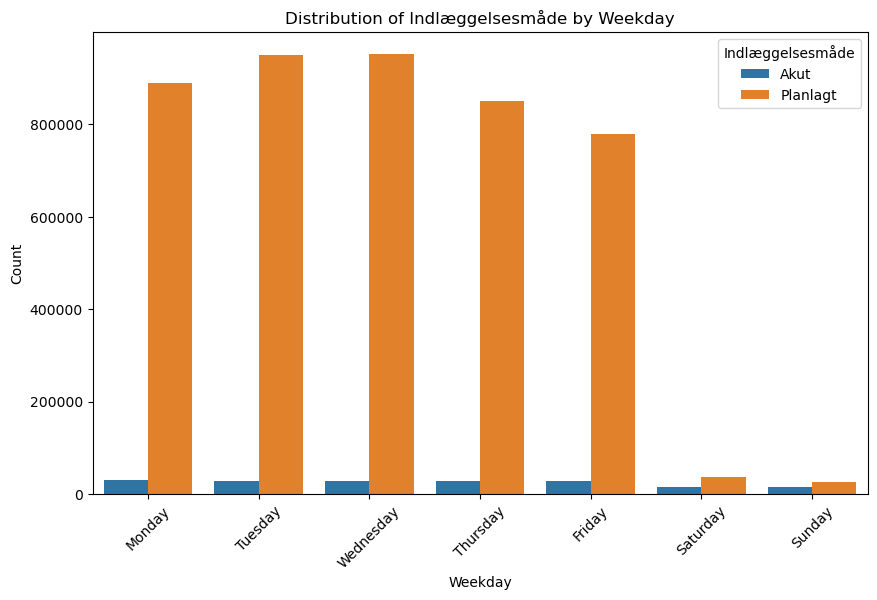

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weekday', hue='Indlæggelsesmåde', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Labels and title
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Distribution of Indlæggelsesmåde by Weekday')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend(title='Indlæggelsesmåde')

# Show plot
plt.show()

C:\Users\jacob\AppData\Local\Temp\ipykernel_27736\1881922401.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['weekday', 'Indlæggelsesmåde']).size().unstack().fillna(0)


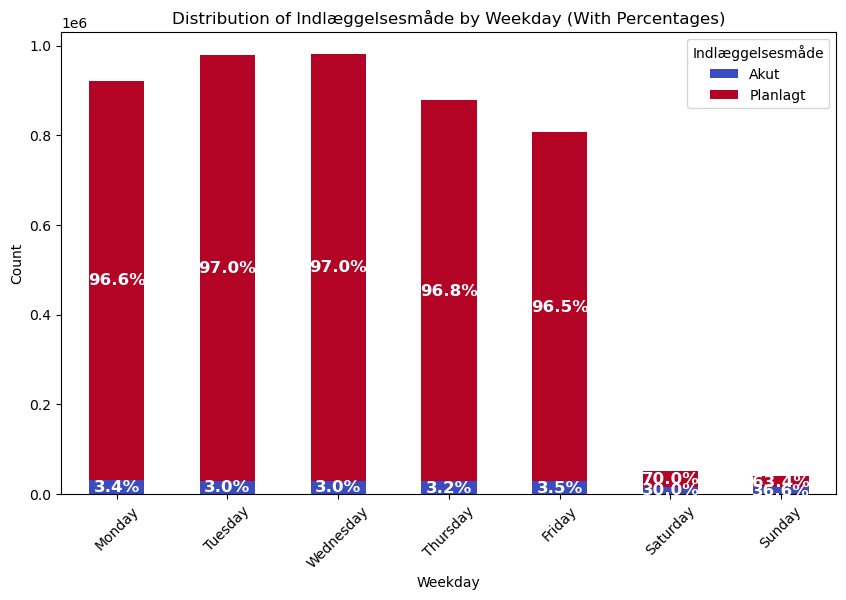

In [23]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count occurrences of each category per weekday
counts = df.groupby(['weekday', 'Indlæggelsesmåde']).size().unstack().fillna(0)

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
counts.loc[weekday_order].plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

# Annotate with percentages
for i, weekday in enumerate(weekday_order):
    total = counts.loc[weekday].sum()
    bottom = 0
    for category in counts.columns:
        value = counts.loc[weekday, category]
        if value > 0:
            percentage = percentages.loc[weekday, category]
            ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
        bottom += value

# Labels and title
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Distribution of Indlæggelsesmåde by Weekday (With Percentages)')
plt.xticks(rotation=45)
plt.legend(title='Indlæggelsesmåde')

# Show plot
plt.show()